In [ ]:
#códigos utilizados para as aulas de programação reativa com python

In [1]:
#instalando o rx para o google colab
!pip install rx

  Using cached Rx-3.1.1-py3-none-any.whl (197 kB)


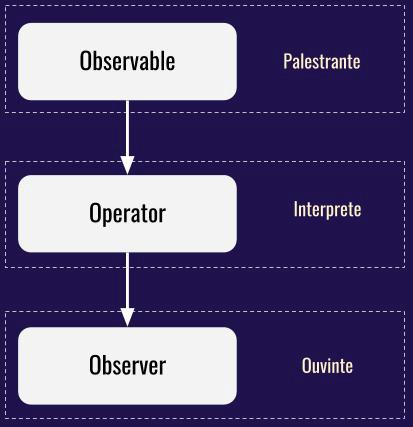

In [ ]:
#Hello world com programação reativa
import rx
import rx.operators as ops

#source = rx.from_iterable([1,2,3,4,5])
source = rx.from_iterable([1,2,'abc',4,5])

disposable=source.pipe(
    ops.map(lambda i:i-1),
    ops.filter(lambda i:i%2==0),
).subscribe(
    on_next=lambda i: print("on_next: {}".format(i)),
    on_completed=lambda: print("on_completed"),
    on_error=lambda e:print("on_error: {}".format(e))
)

disposable.dispose()

print("Fim")

In [ ]:
#implementado observers
#rx.Observer implementa todas as principais funções necessárias para a construção do oberver (on_next, on_completed, on_error)
# on_next ->chamada sempre que o "observer" recebe um novo evento
# on_completed -> chamada quando o "observable" notifica que finalizou a tarefa
# on_error -> utilizada para capturar o error gerado


from rx import create, disposable
#import rx

#função que recebe os observer
def push_five_strings(observer,scheduler):
        observer.on_next("Alpha")
        observer.on_next("Beta")
        observer.on_next("Gamma")
        observer.on_next("Delta")
        observer.on_next("Epsilon")
        observer.on_completed()

#classe filha da classe Observer
class PrintObserver(disposable.Disposable):

    def on_next(self, value):
        print("Recebido {0}".format(value))

    def on_completed(self):
        print("Fim!")

    def on_error(self, error):
        print("Erro identificado: {0}".format(error))

#cria o observable
source = create(push_five_strings)
#define o observer
source.subscribe(PrintObserver())

In [ ]:
#Observable factories
from rx import of

#cria o observable
source = of("Alpha", "Beta", "Gamma", "Delta", "Epsilon")

source.subscribe(
on_next = lambda i: print("Recebido {0}".format(i)),
on_error = lambda e: print("Erro identificado: {0}".format(e)),
on_completed = lambda: print("Finalizado!"),
)


In [ ]:
from rx import  disposable,create

stocks = [
  { 'TCKR' : 'APPL', 'PRICE': 200},
  { 'TCKR' : 'GOOG', 'PRICE': 90},
  { 'TCKR' : 'TSLA', 'PRICE': 120},
  { 'TCKR' : 'MSFT', 'PRICE': 150},
  { 'TCKR' : 'INTL', 'PRICE': 70},
]

def buy_stock_events(observer,scheduler):
  for stock in stocks:
    if(stock['PRICE'] > 100):
      observer.on_next(stock['TCKR'])
  observer.on_completed()

class StockObserver(disposable.Disposable):

  def on_next(self, value):
    print("Instruções recebidas para comprar a ação {0}".format(value))

  def on_completed(self):
    print("Todas as instruções de compra foram finalizadas")

  def on_error(self, error):
    print("Erro encontrado em: {0}".format(error))

source = create(buy_stock_events)
source.subscribe(StockObserver())

In [ ]:
from rx import Observable, create

stocks = [
  { 'TCKR' : 'APPL', 'PRICE': 200},
  { 'TCKR' : 'GOOG', 'PRICE': 90},
  { 'TCKR' : 'TSLA', 'PRICE': 120},
  { 'TCKR' : 'MSFT', 'PRICE': 150},
  { 'TCKR' : 'INTL', 'PRICE': 70},
]

def buy_stock_events(observer,scheduler):
  for stock in stocks:
    if(stock['PRICE'] > 100):
      observer.on_next(stock['TCKR'])
  observer.on_completed()


source = create(buy_stock_events)

source.subscribe(lambda value: print("Instruções recebidas para comprar {0}".format(value)))

**Função Lambda**

In [ ]:
from rx import create

stocks = [
  { 'TCKR' : 'APPL', 'PRICE': 200},
  { 'TCKR' : 'GOOG', 'PRICE': 90},
  { 'TCKR' : 'TSLA', 'PRICE': 120},
  { 'TCKR' : 'MSFT', 'PRICE': 150},
  { 'TCKR' : 'INTL', 'PRICE': 70},
]

def buy_stock_events(observer,scheduler):
  for stock in stocks:
    if(stock['PRICE'] > 100):
      observer.on_next(stock['TCKR'])
  observer.on_completed()


source = create(buy_stock_events)

source.subscribe(on_next=lambda value: print("Instruções recebidas para comprar {0}".format(value)),
                on_completed=lambda: print("Instruções de compra finalizadas"),
                on_error=lambda e: print(e))

**Filtros e Operadores**

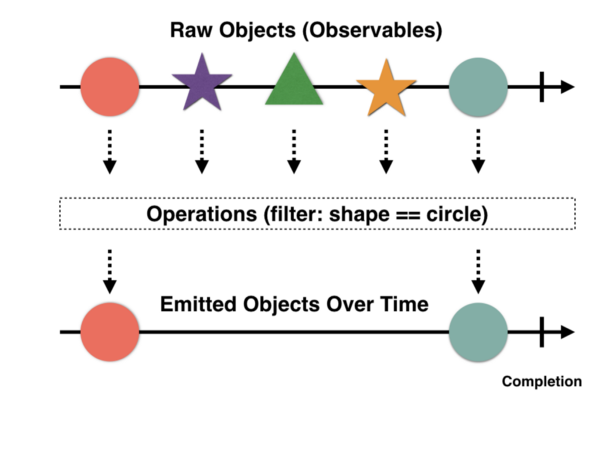

In [ ]:
from rx import of, operators as op

of("Alpha", "Beta", "Gamma", "Delta", "Epsilon").pipe(
  op.map(lambda s: len(s)),
  op.filter(lambda i: i >= 5)
  ).subscribe(lambda value: print("Recebido {0}".format(value)))

**Operadores em cadeia**

In [ ]:
from rx import of, operators as op

#define o observable  
source = of("Alpha", "Beta", "Gamma", "Delta", "Epsilon")

#definindo um pipeline de operações
composed = source.pipe(
  op.map(lambda s: len(s)),
  op.filter(lambda i: i >= 5)
)
composed.subscribe(lambda value: print("Recebido {0}".format(value)))


**Construindo os próprios operadores**

In [ ]:
import rx
from rx import operators as ops

def length_more_than_5():
  return rx.pipe(
  ops.map(lambda s: len(s)),
  ops.filter(lambda i: i >= 5),
  )

rx.of("Alpha", "Beta", "Gamma", "Delta", "Epsilon").pipe(
  length_more_than_5()
  ).subscribe(lambda value: print("Recebido {0}".format(value)))

In [ ]:
import rx

#criando uma sequencia de operações
def lowercase():
  def _lowercase(source):
    def subscribe(observer, scheduler = None):
      def on_next(value):
        observer.on_next(value.lower())
      return source.subscribe(
                on_next,
                observer.on_error,
                observer.on_completed,
                scheduler)
    return rx.create(subscribe)
  return _lowercase

rx.of("Alpha", "Beta", "Gamma", "Delta", "Epsilon").pipe(
lowercase()
).subscribe(lambda value: print("Recebido {0}".format(value)))

**Operadores - continuação**

In [ ]:
import rx
from rx import operators as ops
import operator
a = rx.of(1, 2, 3, 4)
b = rx.of(2, 2, 4, 4)
a.pipe(
ops.zip(b), #retorna uma tupla contendo os valores
ops.map(lambda z: operator.mul(z[0], z[1])) #aplica a operação de multiplicação entre cada um dos elementos das duas listas
).subscribe(print)

In [ ]:
import rx
from rx import operators as ops
obs1 = rx.from_([1, 2, 3, 4])
obs2 = rx.from_([5, 6, 7, 8])
obs_list = [obs1, obs2]
res = rx.merge(*obs_list)
res.subscribe(print)

In [ ]:
import rx, operator as op
obs1 = rx.from_([1, 2, 3, 4])
obs2 = rx.from_([5, 6, 7, 8])
res = rx.merge(obs1, obs2)  #aplica a operação de merge sobre os dados
res.subscribe(print)

**Concorrência**

In [ ]:
import multiprocessing
import random
import time
from threading import current_thread
import rx
from rx.scheduler import ThreadPoolScheduler
from rx import operators as ops

def intense_calculation(value):
  # função sleep para "dormir" e simular uma tarefa de longa duração
  time.sleep(random.randint(5, 20) * 0.1)
  return value

# calcula a quantidade de CPUs, e cria ThreadPoolScheduler com o número de threads
optimal_thread_count = multiprocessing.cpu_count()
pool_scheduler = ThreadPoolScheduler(optimal_thread_count)
# Cria o Processo 1
rx.of("Alpha", "Beta", "Gamma", "Delta", "Epsilon").pipe(
  ops.map(lambda s: intense_calculation(s)), ops.subscribe_on(pool_scheduler)
  ).subscribe(
    on_next=lambda s: print("PROCESSO 1: {0} {1}".format(current_thread().name, s)),
    on_error=lambda e: print(e),
    on_completed=lambda: print("PROCESSO 1 finalizado!"),
 )
  
# Cria o Processo 2
rx.range(1, 10).pipe(
  ops.map(lambda s: intense_calculation(s)), ops.subscribe_on(pool_scheduler)
  ).subscribe(
    on_next=lambda i: print("PROCESSO 2: {0} {1}".format(current_thread().name, i)),
    on_error=lambda e: print(e),
    on_completed=lambda: print("PROCESSO 2 finalizado!"),
  )

# Cria o  Processo 3, com o loop infinito
rx.interval(1).pipe(
  ops.map(lambda i: i * 100),
  ops.observe_on(pool_scheduler),
  ops.map(lambda s: intense_calculation(s)),
).subscribe(
  on_next=lambda i: print("PROCESSO 3: {0} {1}".format(current_thread().name, i)),
  on_error=lambda e: print(e),
)

input("Pressione alguma tecla para sair\n")